In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScalers

In [2]:
dataset = pd.read_csv("Handwritten_Data.csv").astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)

X = dataset.drop('label', axis=1)
Y = dataset['label']

In [9]:
print("shape:",X.shape)
print("culoms count:",len(X.iloc[1]))
print("784 = 28X28")

X.head()

shape: (372450, 784)
culoms count: 784
784 = 28X28


,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28).astype('float32')

# Y_train = np_utils.to_categorical(Y_train)
# Y_test = np_utils.to_categorical(Y_test)

In [6]:
print(f"Shape of train labels is: {Y_train.shape}")
print(f"Shape of train images is: {X_train.shape}")
print(f"Shape of test labels is: {Y_test.shape}")
print(f"Shape of test images is: {X_test.shape}")

Shape of train labels is: (279337,)
Shape of train images is: (279337, 28, 28)
Shape of test labels is: (93113,)
Shape of test images is: (93113, 28, 28)


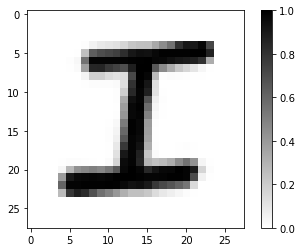

In [7]:
plt.figure()
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Initial Layer
    tf.keras.layers.Dense(128,activation='relu'), # Hidden Layer
    tf.keras.layers.Dense(26) # Output Layer
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
8730/8730 [==============================] - 21s 2ms/step - loss: 0.2821 - accuracy: 0.9228
Epoch 2/10
8730/8730 [==============================] - 31s 4ms/step - loss: 0.1257 - accuracy: 0.9646
Epoch 3/10
8730/8730 [==============================] - 68s 8ms/step - loss: 0.0975 - accuracy: 0.9725
Epoch 4/10
8730/8730 [==============================] - 33s 4ms/step - loss: 0.0825 - accuracy: 0.9762
Epoch 5/10
8730/8730 [==============================] - 29s 3ms/step - loss: 0.0719 - accuracy: 0.9791
Epoch 6/10
8730/8730 [==============================] - 29s 3ms/step - loss: 0.0640 - accuracy: 0.9810
Epoch 7/10
8730/8730 [==============================] - 29s 3ms/step - loss: 0.0572 - accuracy: 0.9829
Epoch 8/10
8730/8730 [==============================] - 30s 3ms/step - loss: 0.0524 - accuracy: 0.9840
Epoch 9/10
8730/8730 [==============================] - 29s 3ms/step - loss: 0.0482 - accuracy: 0.9854
Epoch 10/10
8730/8730 [==============================] - 29s 3ms/step - l

In [11]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

print(f"\nTest Accuracy: {test_acc}")

2910/2910 - 5s - loss: 0.0962 - accuracy: 0.9775 - 5s/epoch - 2ms/step

Test Accuracy: 0.9774789810180664


In [25]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
pred = probability_model.predict(X_test)

2910/2910 [==============================] - 5s 2ms/step


The number that the model believes that the image is: N with a confidence of 0.9999990463256836


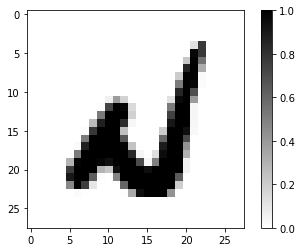

In [33]:
image_number = 120
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 

print(f"The number that the model believes that the image is: {alphabets_mapper[np.argmax(pred[image_number])]} with a confidence of {np.max(pred[image_number])}")
plt.figure()
plt.imshow(X_test[image_number], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()